# Classification: Magic Gamma Telescope

## 1. Data Exploration

### 1.1 Load and Prepare Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('magic04.data')
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


The columns in this dataset are not labeled.

In [2]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df.columns = col_names
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


The dataset consists of 10 features and 1 target.
- Features: fLength, fWidth, fSize, fConc, fCOnc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist
- Target: class

In [3]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In class, there are two unique objects which are 'g' for gamma and 'h' for hadron. We can use LabelEncoder to turn this into 0 and 1 respectively.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df['class'].unique()

array([0, 1])

### 1.2 Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19019 non-null  float64
 1   fWidth    19019 non-null  float64
 2   fSize     19019 non-null  float64
 3   fConc     19019 non-null  float64
 4   fConc1    19019 non-null  float64
 5   fAsym     19019 non-null  float64
 6   fM3Long   19019 non-null  float64
 7   fM3Trans  19019 non-null  float64
 8   fAlpha    19019 non-null  float64
 9   fDist     19019 non-null  float64
 10  class     19019 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 1.5 MB


The dataset contains 19019 entries and no null values.

In [6]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000
mean,53.251440,22.181291,2.825026,0.380326,0.214658,-4.333429,10.544942,0.250170,27.645052,193.823912,0.351648
std,42.365598,18.346484,0.472609,0.182818,0.110514,59.207163,51.001391,20.827896,26.104151,74.729344,0.477497
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863700,2.477100,0.235800,0.128450,-20.588300,-12.845050,-10.849750,5.546950,142.499000,0.000000
50%,37.149000,17.140600,2.739600,0.354100,0.196500,4.011900,15.309400,0.689800,17.677000,191.856900,0.000000
75%,70.126850,24.739950,3.101600,0.503700,0.285250,24.060350,35.844100,10.947050,45.884100,240.564550,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [12]:
df.groupby('class').size()

class
0    12331
1     6688
dtype: int64

Our dataset is imbalanced due to having more gamma instances compared to hadron.

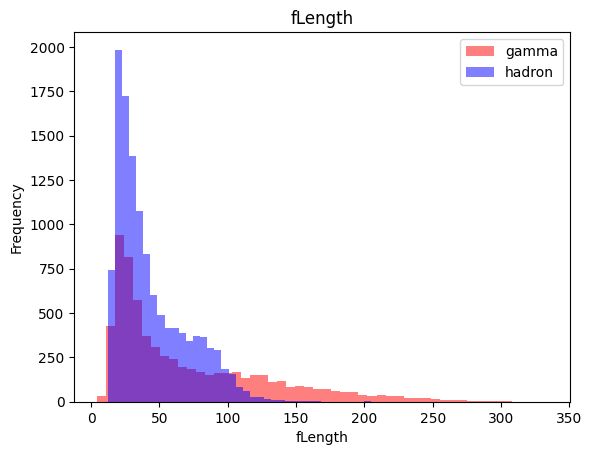

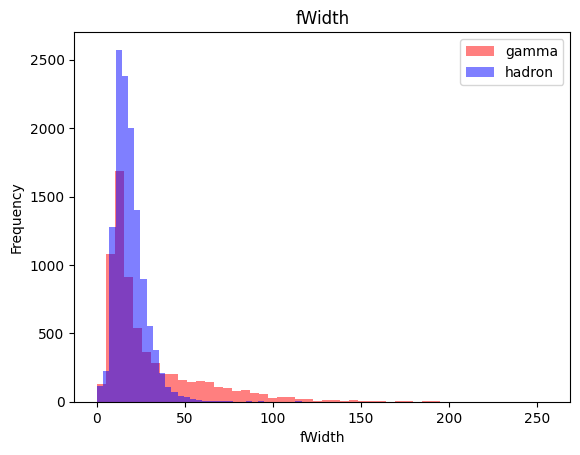

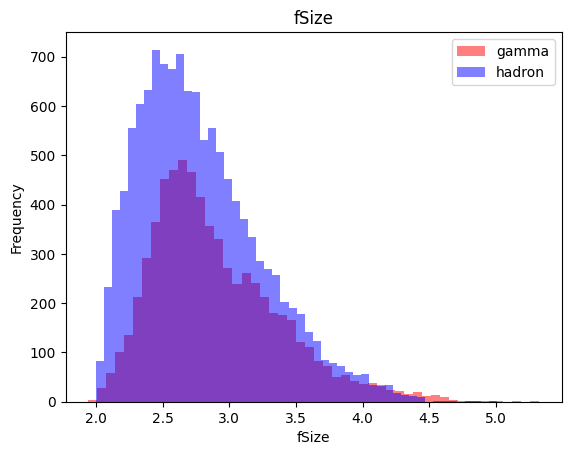

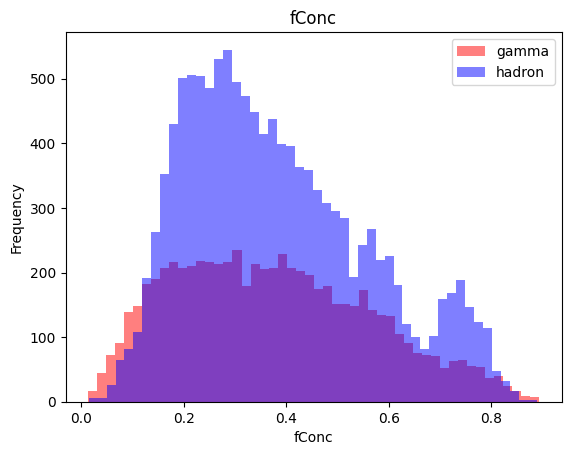

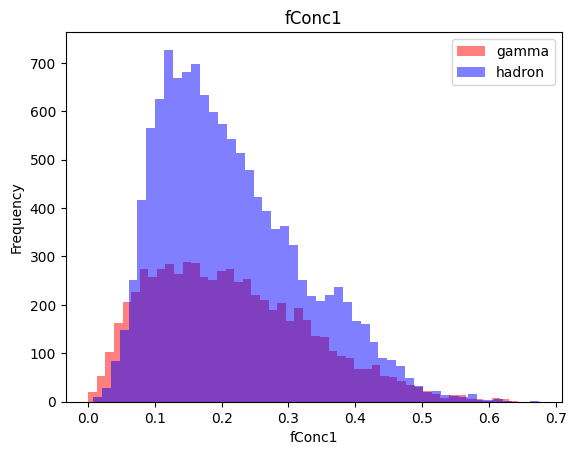

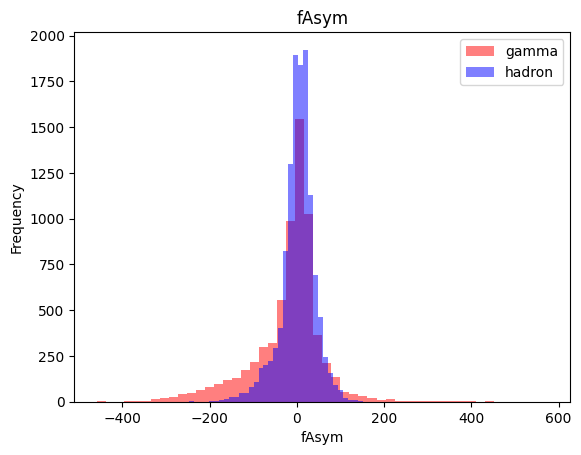

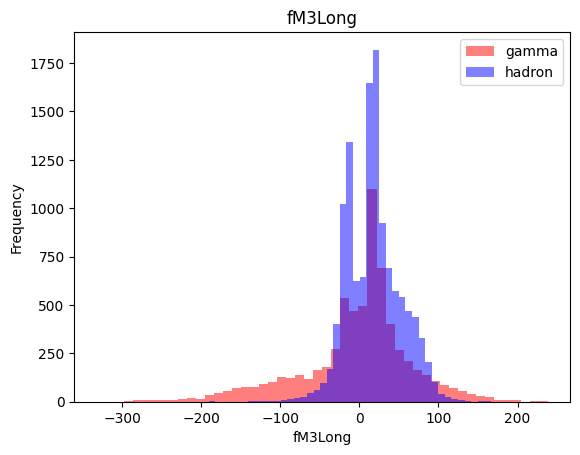

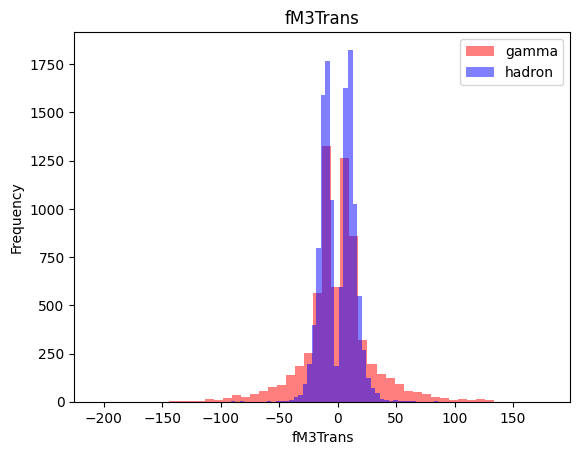

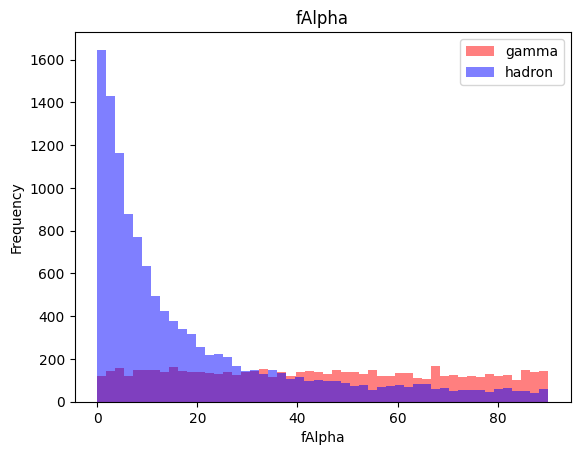

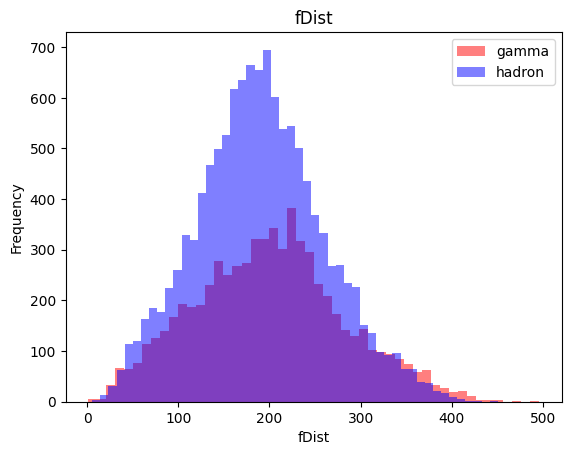

In [10]:
# Plot histograms for each feature
for label in col_names[:-1]:
    plt.figure()
    plt.hist(df[df["class"]==1][label], bins = 50, alpha=0.5, label='gamma', color='r')
    plt.hist(df[df["class"]==0][label], bins = 50, alpha=0.5, label='hadron', color='b')
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## 2. Data Preprocessing

### 2.1 Split features and target

In [13]:
X = df.drop('class', axis=1)
y = df['class']
print(X.shape)
print(y.shape)

(19019, 10)
(19019,)


### 2.2 Split train, validation and test dataset